In [1]:
import pandas as pd
import os
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from wordcloud import WordCloud
from PIL import Image
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
from konlpy.tag import Mecab
from collections import Counter
from tqdm import tqdm
import re
import gc
import warnings
warnings.filterwarnings('ignore')

***
### 뉴스 기사 텍스트 분석

In [2]:
cd /Users/kisehyun/Competition/문화빅데이터/뉴스기사/

/Users/kisehyun/Competition/문화빅데이터/뉴스기사


In [3]:
file_dir = sorted(os.listdir())

In [4]:
travel = pd.read_csv('여행.csv')
show = pd.read_csv('공연.csv')

In [5]:
travel.drop_duplicates(subset = ['제목', '본문'], inplace = True)
show.drop_duplicates(subset = ['제목', '본문'], inplace = True)

In [6]:
travel.dropna(inplace = True)
show.dropna(inplace = True)

In [7]:
travel['시간'] = pd.to_datetime(travel['시간'].str[:10])
show['시간'] = pd.to_datetime(show['시간'].str[:10])

In [8]:
travel['Year'] = travel['시간'].dt.year
show['Year'] = show['시간'].dt.year

In [9]:
mecab = Mecab()

In [10]:
def cleansing_text(data) :
    
    data['Text'] = data['제목'] + ' ' + data['본문']
    data['Text'] = data['Text'].str.replace('연합뉴스', '')
    data['Text'] = data['Text'].str.replace('사진=', '')
    data['Text'] = data['Text'].str.replace('사진 =', '')
    data['Text'] = data['Text'].str.replace('제공=', '')
    data['Text'] = data['Text'].str.replace('제공 =', '')
    data['Text'] = data['Text'].str.replace('제공= 자료사진', '')
    data['Text'] = data['Text'].str.replace('사진제공=', '')
    data['Text'] = data['Text'].str.replace('자료 사진', '')
    data['Text'] = data['Text'].str.replace('사진 영상 제보', '')
    data['Text'] = data['Text'].str.replace('=뉴시스', '')
    data['Text'] = data['Text'].str.replace('=연합뉴스', '')
    data['Text'] = data['Text'].str.replace(')', '')
    data['Text'] = data['Text'].str.replace('제공\n', '')
    data['Text'] = data['Text'].str.replace('사진\n', '')
    data['Text'] = [t[:t.find('제공.')] if '제공.' in t else t for t in data['Text']]
    data['Text'] = [t[:t.find('카카오ID')] if '카카오ID' in t else t for t in data['Text']]
    data['Text'] = [t[:t.find('뉴스 이상의')] if '뉴스 이상의' in t else t for t in data['Text']]
    data['Text'] = [t[:t.find('뉴스1')] if '뉴스1' in t else t for t in data['Text']]
    data['Text'] = [t[:t.find('공감언론')] if '공감언론' in t else t for t in data['Text']]
    data['Text'] = data['Text'].str.replace(' 제공 ', ' ')
    data['Text'] = data['Text'].str.replace('여행작가', '')
    data['Text'] = data['Text'].str.replace('재판매 및 DB 금지', '')
    data['Text'] = data['Text'].str.replace('스포츠서울', '')
    data['Text'] = data['Text'].str.replace('', '')
    
    
    return data

In [11]:
travel = cleansing_text(travel)
show = cleansing_text(show)

In [12]:
def make_token_data(data) :
    
    result = []
    for Text in tqdm(data['Text']) :
        try :
            cleansing_text = Text[:Text.index(re.findall(r'[가-힣]+기자', Text)[-1])]
        except :
            try :
                cleansing_text = Text[:Text.index(re.findall(r'[가-힣]+ 기자', Text)[-1])]
            except :
                cleansing_text = Text
        result.append(cleansing_text)
    data['Text'] = result
    
    tokens = []
    for Text in tqdm(data['Text']) :
        nouns = mecab.nouns(Text)
        token = []
        for word in nouns :
            if len(word) > 1 :
                token.append(word)
            else :
                pass
        tokens.append(token)
    
    data['Token'] = tokens
    
    return data#[['Year', 'Token']]

In [13]:
travel = make_token_data(travel)
show = make_token_data(show)

100%|██████████| 27434/27434 [00:13<00:00, 2014.43it/s]


In [14]:
def get_keyword_cnt(data) :
    
    before_corona_t = data[data['Year'].isin([2018, 2019])]
    ing_corona_t = data[data['Year'].isin([2020, 2021])]
    after_corona_t = data[data['Year'] == 2022]
    
    bct_cnt = Counter(before_corona_t['Token'].sum())
    ict_cnt = Counter(ing_corona_t['Token'].sum())
    act_cnt = Counter(after_corona_t['Token'].sum())
    
    return bct_cnt, ict_cnt, act_cnt

In [15]:
t_b, t_i, t_a = get_keyword_cnt(travel)
s_b, s_i, s_a = get_keyword_cnt(show)

In [16]:
def get_wordcloud(INPUT) :
    
    def color_func(word, font_size, position, orientation, random_state = 42, **kwargs):
        c = int(360.0 * 21.0 / 255.0)
        return("hsl({:d},{:d}%, {:d}%)".format(c, c, c))
    
    wc = WordCloud(font_path = 'AppleGothic', background_color = 'white', width = 1000, height = 600, max_font_size = 150, min_font_size = 5, color_func = color_func).generate_from_frequencies(dict(INPUT))
    plt.figure(figsize = (16, 12))
    plt.imshow(wc)
    plt.show()

***
#### 여행/레저

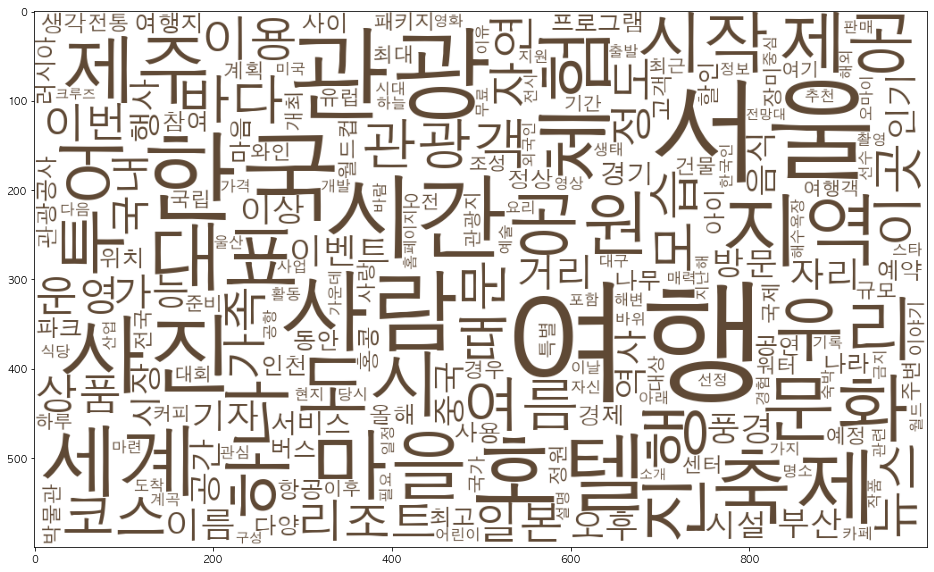

In [17]:
get_wordcloud(t_b)

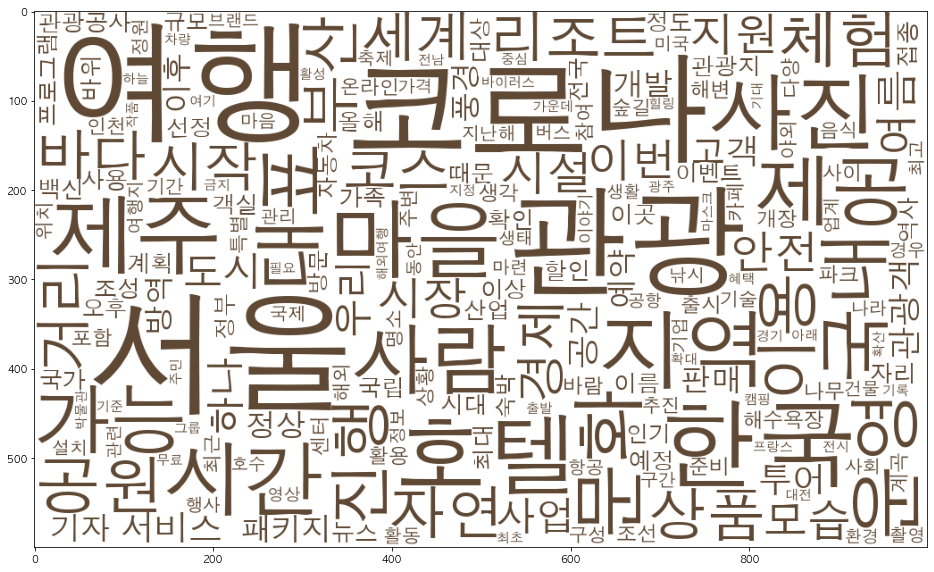

In [293]:
get_wordcloud(t_i)

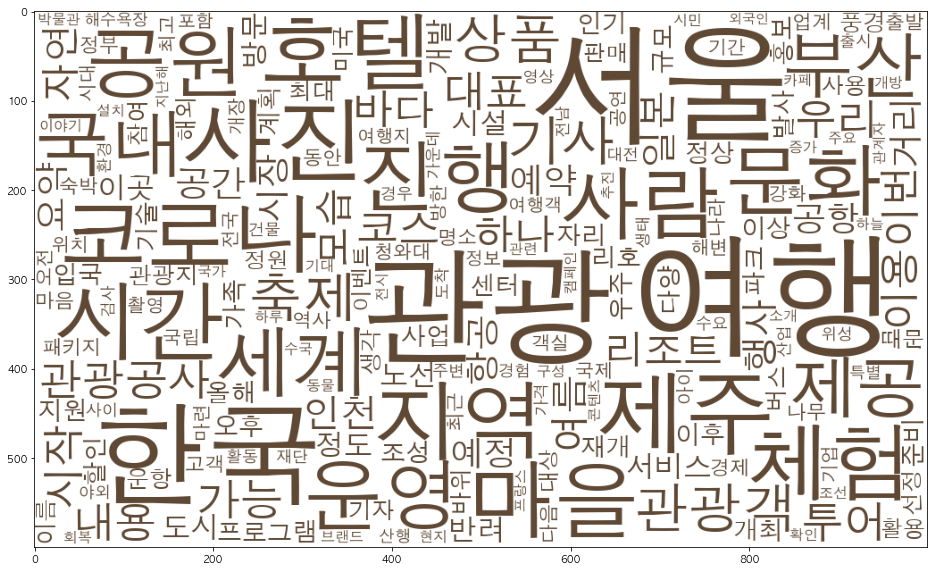

In [294]:
get_wordcloud(t_a)

***
#### 공연/전시

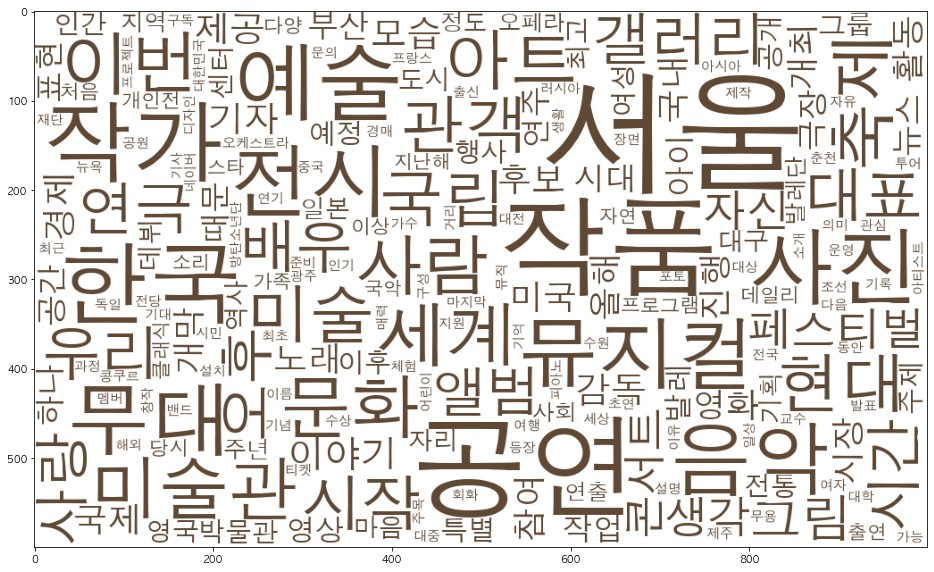

In [295]:
get_wordcloud(s_b)

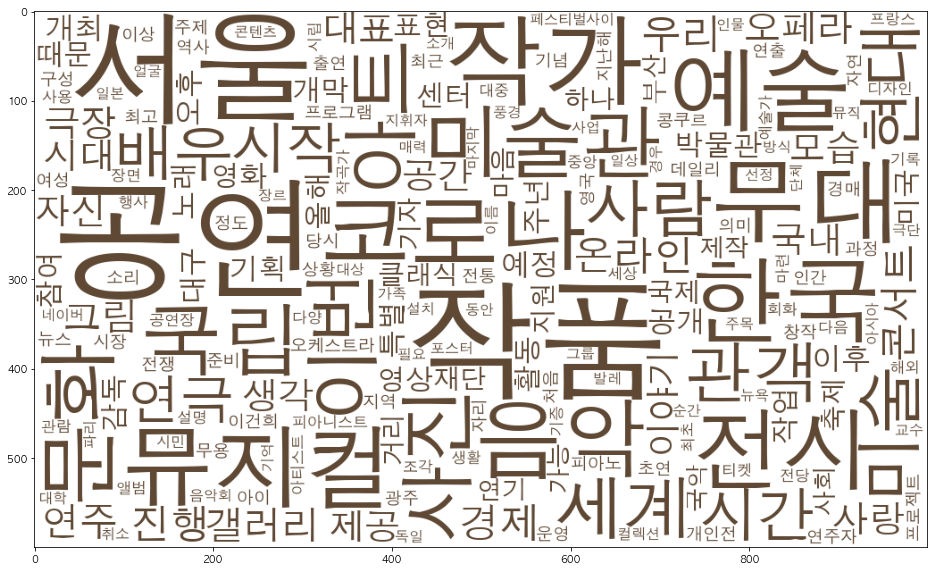

In [296]:
get_wordcloud(s_i)

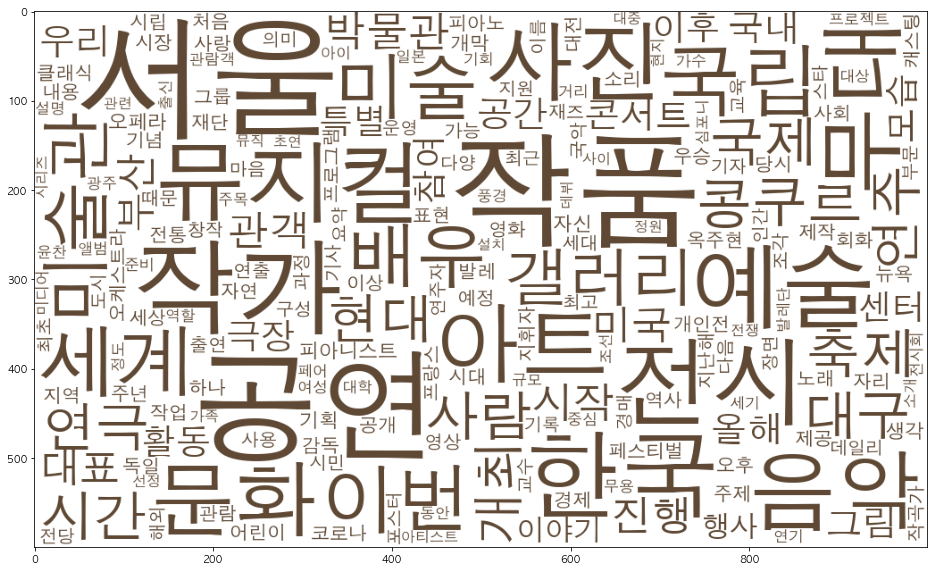

In [297]:
get_wordcloud(s_a)

### 총 기사 건수

In [300]:
travel.shape[0] + show.shape[0]

58364

***
### 국내 여행 지역 관심도

In [1]:
cd /Users/kisehyun/Competition/문화빅데이터/컨슈머인사이트/국내여행지역관심도/

/Users/kisehyun/Competition/문화빅데이터/컨슈머인사이트/국내여행지역관심도


In [5]:
file_dir = sorted(os.listdir())[1:-1]

In [6]:
col_info = pd.read_excel('국내 여행지역 관심도_컬럼정의서.xls')

In [7]:
interest = pd.DataFrame()

In [8]:
for file in file_dir :
    data = pd.read_csv(f'./{file}')
    interest = pd.concat([interest, data], axis = 0, ignore_index = True)
    del data

In [9]:
interest.columns = col_info['컬럼한글명']

In [10]:
interest.응답자ID.nunique()

8434

In [11]:
interest.shape[0]

9062

In [10]:
area_trend = pd.DataFrame()

In [11]:
interest['조사시작일자'] = interest['조사시작일자'].astype(str).str[:6]

In [12]:
for col in interest.columns[6:] :

    df = pd.crosstab(interest['조사시작일자'], interest[col])
    df['better_sum'] = df[df.columns[df.columns.str.contains('커졌다')]].sum(axis = 1)
    df['less_sum'] = df[df.columns[df.columns.str.contains('적어졌다')]].sum(axis = 1)
    df[col] = df['better_sum'] / df['less_sum']
    area_trend = pd.concat([area_trend, df[col]], axis = 1)

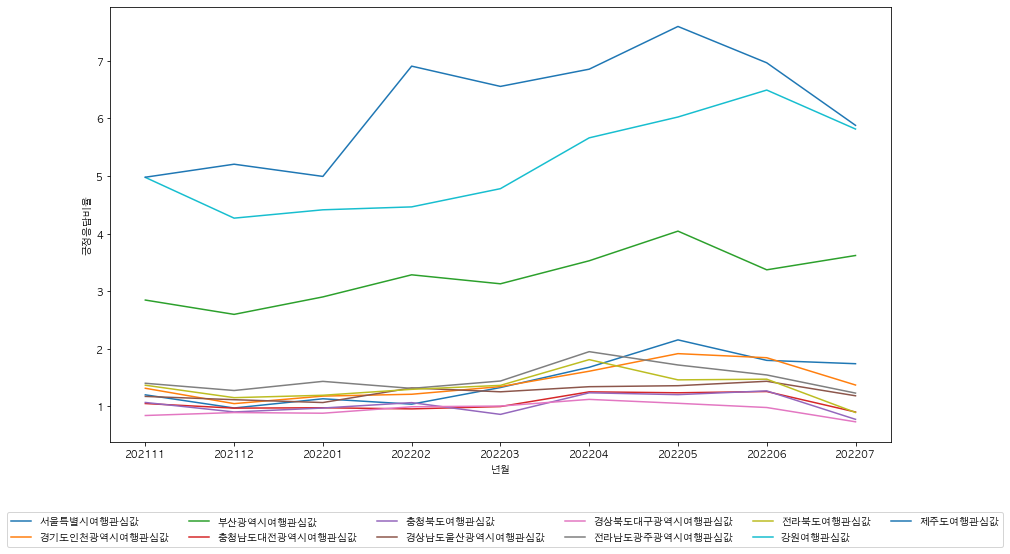

In [13]:
plt.rcParams['figure.figsize'] = (14, 8)
area_trend.plot()
plt.ylabel("긍정응답비율", size = 10)
plt.xlabel('년월', size = 10)
plt.legend(bbox_to_anchor = (1.15, -0.15), ncol = 6)
plt.show()

***
### 여가 관련 지출 동향 및 의향

In [14]:
cd /Users/kisehyun/Competition/문화빅데이터/컨슈머인사이트/여가관련지출동향및의향/

/Users/kisehyun/Competition/문화빅데이터/컨슈머인사이트/여가관련지출동향및의향


In [15]:
col_info = pd.read_excel('./여가관련_지출_동향_및_의향_컬럼정의서.xls')

In [16]:
intent = pd.DataFrame()

In [17]:
for file in sorted(os.listdir())[:-1] :
    data = pd.read_csv(f'./{file}')
    intent = pd.concat([intent, data], axis = 0, ignore_index = True)
    del data

In [18]:
intent.columns = col_info['컬럼한글명']

In [20]:
ts_answer = pd.crosstab(intent['조사시작일자'], intent['레저비용지출의향값'])
ts_answer.index = ts_answer.index.astype(str)

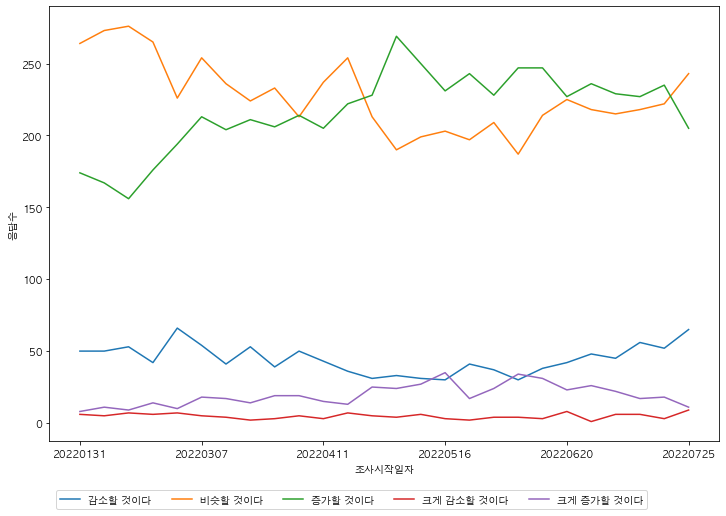

In [21]:
plt.rcParams['figure.figsize'] = (12, 8)
ts_answer.plot()
plt.legend(bbox_to_anchor = (.9, -0.1), ncol = 5)
plt.ylabel('응답수')
plt.show()